## Initialize

In [1]:
import numpy as np
from scipy.io import loadmat, savemat
from sklearn.cluster import MiniBatchKMeans, BisectingKMeans 
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt
import pandas as pd
import Expand

In [2]:
file_path = ['pbp/1-1/R','pbp/1-2/R','pbp/1-3/R','pbp/1-4/R']

In [3]:
label_path = ['orient/0','orient/45','orient/90','orient/135','orient/180','orient/225','orient/270','orient/315']

In [4]:
file_path_R = ['pbp/1-1/R']
file_path_G = ['pbp/1-1/G']
file_path_B = ['pbp/1-1/B']
file_root = ['pbp/1-1/']

### Matrix Element 

In [ ]:
FinalMM = loadmat( file_path[0] + '/FinalMM.mat' )
MMpbp = loadmat( file_path[0] + '/pbps.mat' ) [ 'pbps' ]
clustern = 1024

temp = []
M_elements = ['FinalM11', 'FinalM12', 'FinalM13', 'FinalM14',
              'FinalM21', 'FinalM22', 'FinalM23', 'FinalM24',
              'FinalM31', 'FinalM32', 'FinalM33', 'FinalM34',
              'FinalM41', 'FinalM42', 'FinalM43', 'FinalM44' ]
for element in M_elements:
    temp.append( FinalMM[ element ] )
MM = np.stack( temp,axis = 2 )
MM[:,:,0] = 1.

ss = StandardScaler()
xx = ss.fit_transform( MM.reshape( MM.shape[0] * MM.shape[1],MM.shape[2] ) )
minibkm = MiniBatchKMeans( n_clusters = clustern, batch_size = 10*clustern, random_state = 2021214521 )
minibkm.fit( xx )
label = minibkm.labels_.reshape( MM.shape[ :2 ] )   

groups = []
for i in range( clustern ):
    groups.append( MMpbp[ minibkm.labels_.reshape( MM.shape[ :2 ] ) == i ].mean( axis=0 ) )
groups = np.array( groups )

### Invariant

In [241]:
FinalMM = loadmat( label_path[3] + '/FinalMM.mat' )
MMpbp = loadmat( label_path[3] + '/pbps.mat' ) [ 'pbps' ]
clustern = 1024

temp = []
M_elements = ['FinalM11', 'FinalM12', 'FinalM13', 'FinalM14',
              'FinalM21', 'FinalM22', 'FinalM23', 'FinalM24',
              'FinalM31', 'FinalM32', 'FinalM33', 'FinalM34',
              'FinalM41', 'FinalM42', 'FinalM43', 'FinalM44' ]
for element in M_elements:
    temp.append( FinalMM[ element ] )
    MM = np.stack( temp, axis=2 )
temp = []

DL = np.sqrt( MM[:,:,1]**2 + MM[:,:,2]**2 )
qL = np.sqrt( MM[:,:,13]**2 + MM[:,:,14]**2 )
t1 = 0.5 * np.sqrt( ( MM[:,:,5] - MM[:,:,10] )**2 + ( MM[:,:,6] + MM[:,:,9] )**2 )
b = 0.5 * ( MM[:,:,5] + MM[:,:,10] )
beta = 0.5 * ( MM[:,:,6] - MM[:,:,9] )
MM = np.stack( ( DL, qL, t1, b, beta, MM[:,:,3], MM[:,:,12], MM[:,:,15] ), axis=2 )

ss = StandardScaler()
xx = ss.fit_transform( MM.reshape( MM.shape[0] * MM.shape[1],MM.shape[2] ) )
minibkm = MiniBatchKMeans( n_clusters = clustern, batch_size = 10*clustern, n_init=10, random_state = 2021214521 )
minibkm.fit( xx )
label = minibkm.labels_.reshape( MM.shape[ :2 ] )   

savemat(label_path[3]+'/label.mat',{'label':label})

groups = []
for i in range( clustern ):
    groups.append( MMpbp[ minibkm.labels_.reshape( MM.shape[ :2 ] )==i ].mean( axis=0 ) )
groups = np.array( groups )

savemat(label_path[3]+'/group.mat',{'groups':groups})

### Multiple wavelength

In [ ]:
FinalMM_R = loadmat( file_path_R[0] + '/FinalMM.mat' )
FinalMM_G = loadmat( file_path_G[0] + '/FinalMM.mat' )
FinalMM_B = loadmat( file_path_B[0] + '/FinalMM.mat' )
MMpbp_R = loadmat( file_path_R[0] + '/pbps.mat' ) [ 'pbps' ]
MMpbp_G = loadmat( file_path_G[0] + '/pbps.mat' ) [ 'pbps' ]
MMpbp_B = loadmat( file_path_B[0] + '/pbps.mat' ) [ 'pbps' ]
################
clustern = 10
################
temp = []
M_elements = ['FinalM11', 'FinalM12', 'FinalM13', 'FinalM14',
              'FinalM21', 'FinalM22', 'FinalM23', 'FinalM24',
              'FinalM31', 'FinalM32', 'FinalM33', 'FinalM34',
              'FinalM41', 'FinalM42', 'FinalM43', 'FinalM44' ]
for element in M_elements:
    temp.append( FinalMM_R[ element ] )
    MM_R = np.stack( temp, axis=2 )
temp = []
DL_R = np.sqrt( MM_R[:,:,1]**2 + MM_R[:,:,2]**2 )
qL_R = np.sqrt( MM_R[:,:,13]**2 + MM_R[:,:,14]**2 )
t1_R = 0.5 * np.sqrt( ( MM_R[:,:,5] - MM_R[:,:,10] )**2 + ( MM_R[:,:,6] + MM_R[:,:,9] )**2 )
b_R = 0.5 * ( MM_R[:,:,5] + MM_R[:,:,10] )
beta_R = 0.5 * ( MM_R[:,:,6] - MM_R[:,:,9] )
Data_R = np.stack( ( DL_R, qL_R, t1_R, b_R, beta_R, MM_R[:,:,3], MM_R[:,:,12], MM_R[:,:,15] ), axis=2 )

for element in M_elements:
    temp.append( FinalMM_G[ element ] )
    MM_G = np.stack( temp, axis=2 )
temp = []
DL_G = np.sqrt( MM_G[:,:,1]**2 + MM_G[:,:,2]**2 )
qL_G = np.sqrt( MM_G[:,:,13]**2 + MM_G[:,:,14]**2 )
t1_G = 0.5 * np.sqrt( ( MM_G[:,:,5] - MM_G[:,:,10] )**2 + ( MM_G[:,:,6] + MM_G[:,:,9] )**2 )
b_G = 0.5 * ( MM_G[:,:,5] + MM_G[:,:,10] )
beta_G = 0.5 * ( MM_G[:,:,6] - MM_G[:,:,9] )
Data_G = np.stack( ( DL_G, qL_G, t1_G, b_G, beta_G, MM_G[:,:,3], MM_G[:,:,12], MM_G[:,:,15] ), axis=2 )

for element in M_elements:
    temp.append( FinalMM_B[ element ] )
    MM_B = np.stack( temp, axis=2 )
DL_B = np.sqrt( MM_B[:,:,1]**2 + MM_B[:,:,2]**2 )
qL_B = np.sqrt( MM_B[:,:,13]**2 + MM_B[:,:,14]**2 )
t1_B = 0.5 * np.sqrt( ( MM_B[:,:,5] - MM_B[:,:,10] )**2 + ( MM_B[:,:,6] + MM_B[:,:,9] )**2 )
b_B = 0.5 * ( MM_B[:,:,5] + MM_B[:,:,10] )
beta_B = 0.5 * ( MM_B[:,:,6] - MM_B[:,:,9] )
Data_B = np.stack( ( DL_B, qL_B, t1_B, b_B, beta_B, MM_B[:,:,3], MM_B[:,:,12], MM_B[:,:,15] ), axis=2 )

ss = StandardScaler()
xx_R = ss.fit_transform( Data_R.reshape( MM_B.shape[0] * MM_B.shape[1],8 ) )
xx_G = ss.fit_transform( Data_G.reshape( MM_B.shape[0] * MM_B.shape[1],8 ) )
xx_B = ss.fit_transform( Data_B.reshape( MM_B.shape[0] * MM_B.shape[1],8 ) )

minikm = MiniBatchKMeans( n_clusters=clustern, batch_size=1024, n_init=10, random_state=2021214521 )
minikm.fit( xx_R )
label_R = minikm.labels_.reshape(MM_B.shape[0] , MM_B.shape[1])
minikm.fit( xx_G )
label_G = minikm.labels_.reshape(MM_B.shape[0] , MM_B.shape[1])
minikm.fit( xx_B )
label_B = minikm.labels_.reshape(MM_B.shape[0] , MM_B.shape[1])

#plt.imshow(label_R)
#plt.savefig('label_R.jpg',dpi=1000,bbox_inches='tight')
#plt.imshow(label_G)
#plt.savefig('label_G.jpg',dpi=1000,bbox_inches='tight')
#plt.imshow(label_B)
#plt.savefig('label_B.jpg',dpi=1000,bbox_inches='tight')

labels = np.stack( ( label_R, label_G, label_B ), axis=2 ).reshape(label_R.shape[0]*label_R.shape[1],3)
a,s,p = np.unique(labels, return_index=True, return_inverse=True,axis=0)
print( np.shape( np.unique( p ) ) )
p=p.reshape(MM_R.shape[0],MM_R.shape[1])
#plt.imshow(p)
#plt.savefig('label.jpg',dpi=1000,bbox_inches='tight')
label=p
savemat(file_root[0] + 'label.mat',{'label':label})

groups = []
groups_R_mean=[]
groups_G_mean=[]
groups_B_mean=[]
for i in range( np.size(np.unique(p)) ):
    groups_R_mean.append( MMpbp_R[ p==i ].mean( axis=0 ) )
    groups_G_mean.append( MMpbp_G[ p==i ].mean( axis=0 ) )
    groups_B_mean.append( MMpbp_B[ p==i ].mean( axis=0 ) )
    groups = np.stack( ( groups_R_mean, groups_G_mean, groups_B_mean ), axis=2 )
groups = np.array( groups )
savemat(file_root[0] + 'groups.mat',{'groups':groups})

### threshold and mask

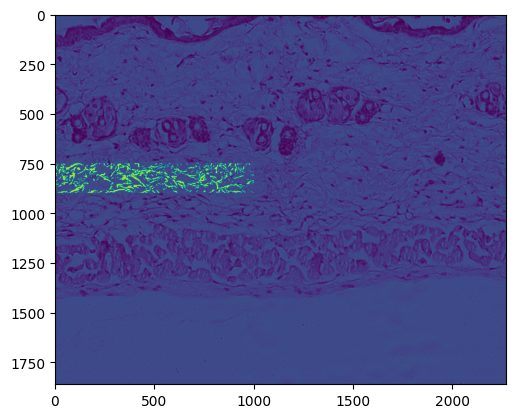

In [5]:
#size_img = np.shape(MM)
#H_img = size_img[ 0 ]
#L_img = size_img[ 1 ]
#D_img = size_img[ 2 ]
#######################################################################
#label = loadmat( label_path [ 7 ] + '/label.mat' ) [ 'label' ]
#label = loadmat( file_path [ 0 ] + '/label.mat' ) [ 'label' ]
m11 = loadmat( file_path[ 2 ] + '/m11.mat' ) [ 'CalibratedM11' ]
t_1213 = loadmat( file_path[ 2 ] + '/MMT_t_1213.mat' ) [ 'MMT_t_1213' ]
label = loadmat( file_path[ 2 ] + '/label.mat' ) [ 'label' ]
threshould = t_1213 > 0.03
mask = np.zeros( t_1213.shape )
mask[ 750:900, 0:1000] = 1
#######################################################################
roi = threshould * mask 
ooo = 3*roi + m11
plt.imshow( ooo )
#plt.savefig( 'ooo.jpg',dpi=1000,bbox_inches='tight')

### weight

In [6]:
Intere = mask * label
a, countsa = np.unique( Intere, return_counts=True )
count_a = np.stack( ( a, countsa, np.zeros( np.shape( a ) ) ), axis=1 )

Mask = label * roi
b, countsb = np.unique( Mask, return_counts=True )
count_b = np.stack( ( b, countsb ), axis=1 )

for i in range( a.size ):
    for j in range( b.size ):
        if count_a[ i,0 ] == count_b[ j,0 ]:
            count_a[ i,2 ] = count_b[ j,1 ]

iou = []
for i in range( a.size ):
    iou.append( count_a[ i,2 ] / ( count_a[ i,1 ] ) )

count_iou = []
for i in range( a.size ):
    count_iou.append( iou[ i ] * count_a[ i,2 ] )

contribute = np.stack( ( a, count_iou ), axis=1 )
contribute1 = contribute[ np.lexsort( -contribute.T ) ]
contribute1 = contribute1[~np.any(contribute1 == 0, axis=1)]

In [44]:
savemat('contribute2.mat',{'contribute2':contribute2})

### contrast ratio

In [6]:
Intere = mask * label
a, countsa = np.unique( Intere, return_counts=True )
count_a = np.stack( ( a, countsa, np.zeros( np.shape( a ) ) ), axis=1 )

Mask = label * roi
b, countsb = np.unique( Mask, return_counts=True )
count_b = np.stack( ( b, countsb ), axis=1 )

for i in range( a.size ):
    for j in range( b.size ):
        if count_a[ i,0 ] == count_b[ j,0 ]:
            count_a[ i,2 ] = count_b[ j,1 ]

iou = []
for i in range( a.size ):
    iou.append( count_a[ i,2 ] / ( count_a[ i,1 ] ) )

contribute = np.stack( ( a, iou ), axis=1 )
contribute1 = contribute[ np.lexsort( -contribute.T ) ]
contribute1 = contribute1[~np.any(contribute1 == 0, axis=1)]

### counts

In [6]:
#label = loadmat( file_path [ 0 ] + '/label.mat' ) [ 'label' ]
#m11 = loadmat( file_path[ 0 ] + '/m11.mat' ) [ 'CalibratedM11' ]
#t_1213 = loadmat( file_path[ 0 ] + '/MMT_t_1213.mat' ) [ 'MMT_t_1213' ]
#threshould = t_1213 > 0.04
#mask = np.zeros( np.shape( m11 ) )
#mask[ 750:1000, 0:500] = 1
#roi = threshould * mask
#plt.imshow( 5 * roi + m11 )
#plt.show()
Mask = label * roi
#plt.imshow( Mask )
#plt.show()
a, indices = np.unique( Mask, return_counts=True )
contribute = np.stack( ( a, indices ), axis=1 )
contribute1 = contribute[ np.lexsort( -contribute.T ) ]

In [43]:
contribute1[1:,:].shape

(1013, 2)

### imshow extend

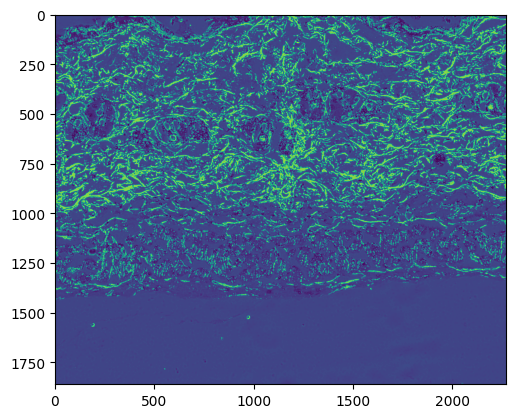

In [88]:
percent10 = contribute1[ 0:int( 0.1 * np.shape( contribute1 )[0] ), 0 ]
percent30 = contribute1[ 0:int( 0.3 * np.shape( contribute1 )[0] ), 0 ]
percent50 = contribute1[ 0:int( 0.5 * np.shape( contribute1 )[0] ), 0 ]
percent70 = contribute1[ 0:int( 0.7 * np.shape( contribute1 )[0] ), 0 ]
percent100 = contribute1[ :, 0 ]
result = np.zeros( m11.shape )

####################################################################
for num in percent50:
    result[ label==num ] = 1
####################################################################

expand_result = 3 * result + m11 
plt.imshow( expand_result )
#plt.savefig( 'expand_result.jpg',dpi=1000,bbox_inches='tight')

In [ ]:
a=Expand.plot_percent(contribute1, m11, label)

In [11]:
all_sp = Intere
interest_sp = Mask
contribute1 = Expand.weight_expand(all_sp, interest_sp)


#### P-R-E record

In [ ]:
standard_mask = loadmat( 'roi_mask.mat' ) [ 'roi' ]
standard_mask1 = standard_mask.reshape( m11.shape[0] * m11.shape[1], 1 )
result1 = result.reshape( m11.shape[0] * m11.shape[1], 1 )
DATA = np.stack( ( standard_mask1, result1 ), axis=1 )
a,indices = np.unique( DATA, return_counts=True, axis=0 )
P=indices[3] / (indices[3] + indices[1])
R=indices[3] / (indices[3] + indices[2])
E=indices[1] / (indices[2] + indices[3])
print(P)
print(R)
print(E)

In [ ]:
P_cr = [0.671,0.707,0.701,0.687,0.678]
R_cr = [0.023,0.081,0.148,0.215,0.347]
E_cr = [0.011,0.034,0.063,0.098,0.165]

P_counts = [0.850,0.798,0.755,0.708,0.677]
R_counts = [0.048,0.128,0.193,0.244,0.348]
E_counts = [0.009,0.032,0.063,0.101,0.166]

P_weight = [0.855,0.788,0.731,0.697,0.678]
R_weight = [0.043,0.115,0.171,0.228,0.347]
E_weight = [0.007,0.031,0.063,0.099,0.165]

P_mul_cr = [0.740,0.705,0.669,0.649,0.664]
R_mul_cr = [0.014,0.091,0.176,0.275,0.578]
E_mul_cr = [0.005,0.038,0.087,0.149,0.293]

P_mul_counts = [0.910,0.803,0.740,0.702,0.664]
R_mul_counts = [0.154,0.322,0.420,0.490,0.578]
E_mul_counts = [0.015,0.079,0.147,0.208,0.293]

P_mul_weight = [0.895,0.771,0.739,0.713,0.664]
R_mul_weight = [0.115,0.221,0.326,0.415,0.578]
E_mul_weight = [0.014,0.066,0.115,0.167,0.293]

x = [0.1,0.3,0.5,0.7,1.0]
labels = [ 'P_mul_cr', 'R_mul_cr', 'E_mul_cr', 'P_mul_counts', 'R_mul_counts', 'E_mul_counts', 'P_mul_weight', 'R_mul_weight', 'E_mul_weight' ]
plt.subplots( figsize = ( 15, 10 ) )
plt.plot( x, P_mul_cr, marker='.', color='r' )
plt.plot( x, R_mul_cr, marker='v', color='r' )
plt.plot( x, E_mul_cr, marker='s', color='r' )
plt.plot( x, P_mul_counts, marker='.', color='b' )
plt.plot( x, R_mul_counts, marker='v', color='b' )
plt.plot( x, E_mul_counts, marker='s', color='b' )
plt.plot( x, P_mul_weight, marker='.', color='g' )
plt.plot( x, R_mul_weight, marker='v', color='g' )
plt.plot( x, E_mul_weight, marker='s', color='g' )
plt.legend( labels=labels )
plt.savefig( 'mul_way.jpg',dpi=1000,bbox_inches='tight')

In [ ]:
pa = ['P_cr', 'R_cr', 'E_cr','P_mul_cr', 'R_mul_cr', 'E_mul_cr']
plt.plot( x, P_cr, marker='.', color='b' )
plt.plot( x, R_cr, marker='v', color='b' )
plt.plot( x, E_cr, marker='s', color='b' )
plt.plot( x, P_mul_cr, marker='.', color='r' )
plt.plot( x, R_mul_cr, marker='v', color='r' )
plt.plot( x, E_mul_cr, marker='s', color='r' )
plt.legend( labels=pa )
plt.savefig( 'cr.jpg',dpi=1000,bbox_inches='tight')

#### orient result record

In [ ]:
# orient change
x = [0,45,90,135,180,225,270,315]
y1 = [366864,368650,347177,363493,404831,307940,368959,390589]
y2 = [317471,298783,303978,344864,394009,262703,339825,342470]
plt.plot( x, y1 )
plt.plot( x, y2 )
plt.legend( [ 'invariants', 'elements' ] )
plt.savefig( 'orient.jpg', dpi=1000, bbox_inches='tight' )

### iteration

#### collagen

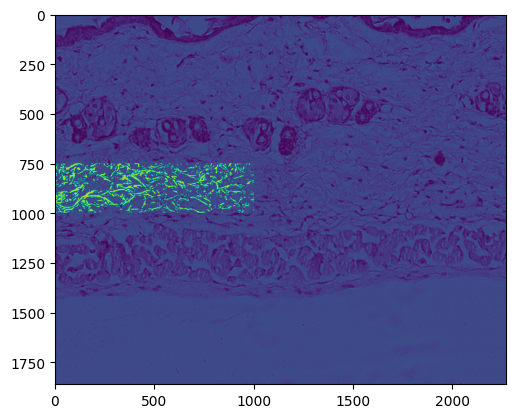

In [230]:
m11 = loadmat( file_path[ 2 ] + '/m11.mat' ) [ 'CalibratedM11' ]
label = loadmat( file_path [ 2 ] + '/label.mat' ) [ 'label' ]
t_1213 = loadmat( file_path[ 2 ] + '/MMT_t_1213.mat' ) [ 'MMT_t_1213' ]
threshould = t_1213 > 0.03
mask = np.zeros( t_1213.shape )
mask[ 750:1000, :1000] = 1
roi = threshould * mask 
ooo = 3*roi + m11
plt.imshow( ooo )
#plt.savefig( 'ooo.jpg',dpi=1000,bbox_inches='tight')
Mask = label * roi
a, indices = np.unique( Mask, return_counts=True )
contribute = np.stack( ( a, indices ), axis=1 )
contribute1 = contribute[ np.lexsort( -contribute.T ) ]

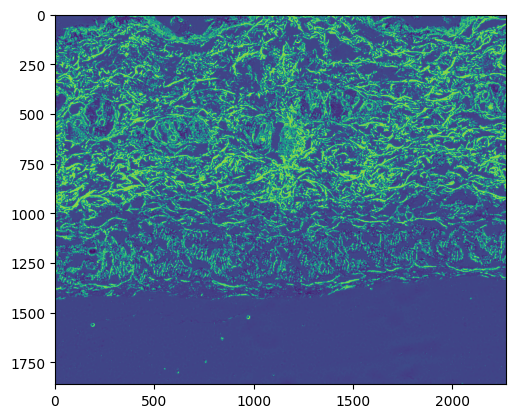

In [231]:
percent10 = contribute1[ 0:int( 0.1 * np.shape( contribute1 )[0] ), 0 ]
percent30 = contribute1[ 0:int( 0.3 * np.shape( contribute1 )[0] ), 0 ]
percent50 = contribute1[ 0:int( 0.5 * np.shape( contribute1 )[0] ), 0 ]
percent70 = contribute1[ 0:int( 0.7 * np.shape( contribute1 )[0] ), 0 ]
percent100 = contribute1[ :, 0 ]
result = np.zeros( m11.shape )

####################################################################
for num in percent70:
    result[ label==num ] = 1
####################################################################

expand_result = 3 * result + m11 
plt.imshow( expand_result )
#plt.savefig( 'expand_result.jpg',dpi=1000,bbox_inches='tight')

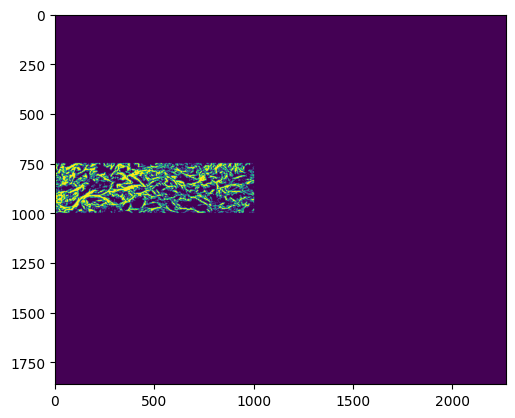

In [232]:
mask1=np.zeros( t_1213.shape )
mask1[1200:,:]=1
roi1 = result *mask1
Mask1 = roi1 * label
mask2=np.zeros( t_1213.shape )
mask2[ 750:1000, :1000]=1
roi2 = result *mask2
Mask2 = roi2 * label
plt.imshow(roi1)
#plt.savefig('negtive.jpg',dpi=1000,bbox_inches='tight')
plt.imshow(roi2)
#plt.savefig('positive.jpg',dpi=1000,bbox_inches='tight')

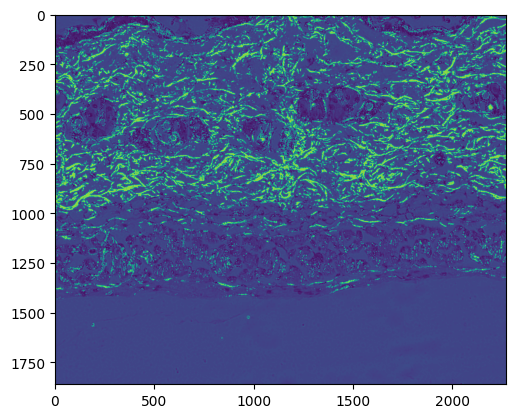

In [233]:
a1, indices1 = np.unique( Mask1, return_counts=True )
contribute1 = np.stack( ( a1, indices1, np.zeros( np.shape( a1 ) )  ), axis=1 )

a2, indices2 = np.unique( Mask2, return_counts=True )
contribute2 = np.stack( ( a2, indices2 ), axis=1 )

for i in range( a1.size ):
    for j in range( a2.size ):
        if contribute1[ i,0 ] == contribute2[ j,0 ]:
            contribute1[ i,2 ] = contribute2[ j,1 ]

iou_pn = []
for i in range( a1.size ):
    iou_pn.append( contribute1[ i,2 ] / ( contribute1[ i,1 ] + contribute1[ i,2 ] ) )

contribute3 = np.stack( ( a1, iou_pn ), axis=1 )
contribute4 = contribute3[ np.lexsort( -contribute3.T ) ]

percent10 = contribute4[ 0:int( 0.1 * np.shape( contribute4 )[0] ), 0 ]
percent30 = contribute4[ 0:int( 0.3 * np.shape( contribute4 )[0] ), 0 ]
percent50 = contribute4[ 0:int( 0.5 * np.shape( contribute4 )[0] ), 0 ]
percent70 = contribute4[ 0:int( 0.7 * np.shape( contribute4 )[0] ), 0 ]
percent100 = contribute4[ :, 0 ]
result = np.zeros( m11.shape )

####################################################################
for num in percent50:
    result[ label==num ] = 1
####################################################################

expand_result = 3 * result + m11 
plt.imshow( expand_result )
plt.savefig('iternal.jpg',dpi=1000,bbox_inches='tight')

In [226]:
percent70.shape
groups=loadmat( file_path [ 1 ] + '/group.mat' ) [ 'groups' ]
y_=np.zeros(1024)
for i in range(percent70.size):
    y_[np.int(percent70[i])]=1
savemat('2collagen_y_.mat',{'y_':y_})

C:\Users\87119\AppData\Local\Temp\ipykernel_25696\1296429342.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_[np.int(percent70[i])]=1


In [165]:
savemat('3collagen_mask.mat',{'collagen1':result})

In [96]:
standard_mask = loadmat( 'roi_mask.mat' ) [ 'roi' ]
standard_mask1 = standard_mask.reshape( m11.shape[0] * m11.shape[1], 1 )
result1 = result.reshape( m11.shape[0] * m11.shape[1], 1 )
DATA = np.stack( ( standard_mask1, result1 ), axis=1 )
a,indices = np.unique( DATA, return_counts=True, axis=0 )
P=indices[3] / (indices[3] + indices[1])
R=indices[3] / (indices[3] + indices[2])
E=indices[1] / (indices[2] + indices[3])
print(P)
print(R)
print(E)

0.8864303762890118
0.010711966124438714
0.001372419080503974


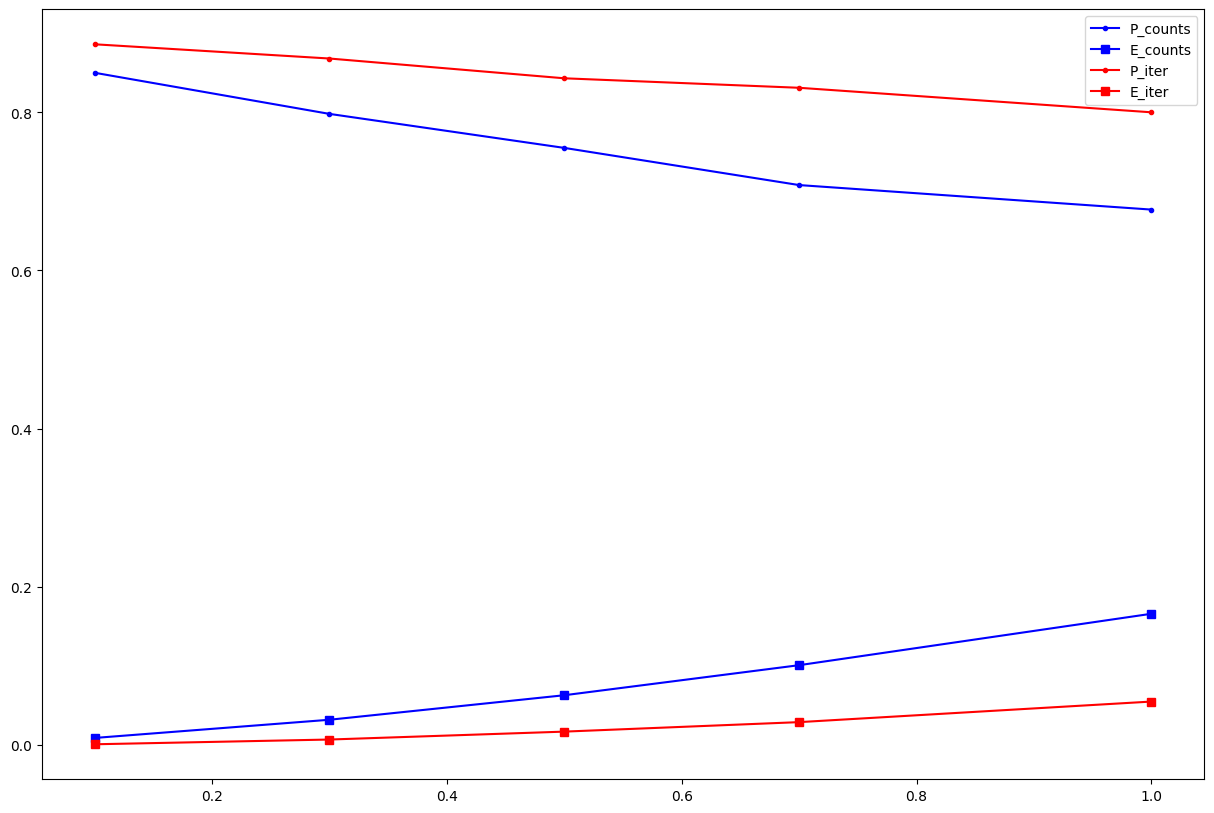

In [105]:
P_counts = [0.850,0.798,0.755,0.708,0.677]
R_counts = [0.048,0.128,0.193,0.244,0.348]
E_counts = [0.009,0.032,0.063,0.101,0.166]

P_iter = [0.886,0.868,0.843,0.831,0.800]
R_iter = [0.011,0.047,0.092,0.142,0.219]
E_iter = [0.001,0.007,0.017,0.029,0.055]

x=[0.1, 0.3, 0.5, 0.7 ,1]
labels = [ 'P_counts',  'E_counts', 'P_iter',  'E_iter' ]
plt.subplots( figsize = ( 15, 10 ) )
plt.plot( x, P_counts, marker='.', color='b' )
#plt.plot( x, R_counts, marker='v', color='b' )
plt.plot( x, E_counts, marker='s', color='b' )
plt.plot( x, P_iter, marker='.', color='r' )
#plt.plot( x, R_iter, marker='v', color='g' )
plt.plot( x, E_iter, marker='s', color='r' )
plt.legend( labels=labels )
plt.savefig( 'iter_pre.jpg',dpi=1000,bbox_inches='tight')